### Assignment 1

Submission should be in a Jupyter note book (.ipynb)

1. Implement a function that converts a ```fixed<w, b>``` representation to a real number. Use two's compement for negative numbers. The function signature is 

   ```python
   def fromFixedPoint(w: int, b:int, bits:[int]) -> float:
   # w: width of the binary representation
   # b: binary point
   ```
   Test the following inputs
   ```python
   fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0])
   ```
   ```python
   fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1])
   ```
   ```python
   fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1])
   ```
   


In [15]:
def fromFixedPoint(w: int, b:int, bits:[int]) -> float:
    if len(bits) != w:
        raise ValueError("Length of bits must be equal to w")

    value = sum(bits[i] * (2 ** (w - 1 - i - b)) for i in range(1, w))

    if bits[0] == 1:  
        value -= 2 ** (w - b - 1)

    return value

In [16]:
fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]) 

44.75

In [17]:
fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1]) 

-13.28125

In [18]:
fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1])

-21.25

2. Calculate the price of the following questions step by step using two step Cox Rox Rubinstein (CRR) Binomial tree

    a. European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$
    
    b. European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$
    
    c. European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$
    
    d. European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$
    
    What is the value of the portfolio that is long (a) and short (b)? How about the portfolio that long (c) and short (d)? 

    Note: Don't use codes to generate numbers. Calcualte them manually.
    

#### Long(a) Short(b):
We have parameters as follows:

- $ S_0 = 100 $
- $ K = 105 $
- $ r = 3\% = 0.03 $
- $ T = 1 $ year
- $ n = 2 $
- $ \sigma_{ab} = 20\% = 0.20 $  
- $ \Delta t = \frac{T}{n} = \frac{1}{2} = 0.5 $

We known $ b = e^{(\sigma^2 + r) t} + e^{-r t} \quad u = \frac{b + \sqrt{b^2 - 4}}{2}, \quad d = \frac{1}{u},  \quad p = \frac{e^{r \Delta t} - d}{u - d} $  
For long(a) and short(b):($\sigma = 0.20$):  
 - $$ b = e^{(\sigma^2 + r) t} + e^{-r t}
        = e^{((0.2)^2 + 0.03) 0.5} + e^{-0.03 \times 0.5}
        \approx 2.020731
   $$
 - $$ u = \frac{b + \sqrt{b^2 - 4}}{2}
        = \frac{2.020731 + \sqrt{2.020731^2 - 4}}{2}
        \approx 1.154720
   $$
 - $$ d = \frac{1}{1.154720} \approx 0.866 $$
 - $$ p = \frac{e^{0.03 \times 0.5} - 0.866}{1.154720 - 0.866}
        \approx 0.516463
   $$

WE know that the first step is(from t = 0 to t = 1):
$$
S_u = S_0 u = 100 \times 1.154720 = 115.472,  \\
S_d = S_0 d = 100 \times 0.866 = 86.6
$$  
And the second step is(from t = 1 to t = 2):  
$$
S_{uu} = S_u \cdot u = 115.472 \times 1.154720 = 133.3378278  \\
S_{ud} = S_{du} = S_u \cdot d = S_d \cdot u = 115.472 \times 0.866 = 86.6 \times 1.154720 = 99.998752  \\
S_{dd} = S_d \cdot d = 86.6 \times 0.866 = 74.9956
$$
##### (a):
$$
\begin{aligned}
C_{uu} &= \max(S_{uu} - k,\; 0) \;=\; \max(133.3378278 \;-\; 105,\; 0) \;=\; 28.3378278,  \\
C_{ud} &= \max(S_{ud} - k,\; 0) \;=\; \max(99.998752 \;-\; 105,\; 0) \;=\; 0,  \\
C_{dd} &= \max(S_{dd} - k,\; 0) \;=\; \max(74.9856 \;-\; 105,\; 0) \;=\; 0.
\end{aligned}
$$

$$
\begin{aligned}
C_u 
&= e^{-r \Delta t}\,\bigl[p\,C_{uu} + (1-p)\,C_{ud}\bigr]
   = e^{-0.03 \times 0.5}
     \Bigl[\,0.516463 \times 28.3378278 + 0\,\Bigr]
   = 14.41754625,\\[6pt]
C_d 
&= e^{-r \Delta t}\,\bigl[p\,C_{ud} + (1-p)\,C_{dd}\bigr]
   = e^{-0.03 \times 0.5}
     \Bigl[\,0.516463 \times 0 + (1 - 0.5146383) \times 0\Bigr]
   = 0,\\[6pt]
C_0 
&= e^{-r \Delta t}\,\bigl[p\,C_u + (1-p)\,C_d\bigr]
   = e^{-0.03 \times 0.5}
     \Bigl[\,0.516463 \times 14.41754625 + (1 - 0.516463) \times 0\Bigr]
   = 7.335217.
\end{aligned}
$$
##### (b):
$$
\begin{aligned}
P_{uu} &= \max(K - S_{uu},\; 0) \;=\; \max(105 \;-\; 133.3378278,\; 0) \;=\; 0,  \\
P_{ud} &= \max(K - S_{ud},\; 0) \;=\; \max(105 \;-\; 99.998752,\; 0) \;=\; 5.001248,  \\
P_{dd} &= \max(K - S_{dd},\; 0) \;=\; \max(105 \;-\; 74.9956,\; 0) \;=\; 30.0044.
\end{aligned}
$$

$$
\begin{aligned}
P_u 
&= e^{-r \Delta t}\,\bigl[p\,P_{uu} + (1-p)\,P_{ud}\bigr]
   = e^{-0.03 \times 0.5}
     \Bigl[\,0.516463 \times 0 \;+\; 0.483537 \times 5.001248\Bigr]
   \;\approx\; 2.382285,  \\
P_d 
&= e^{-r \Delta t}\,\bigl[p\,P_{ud} + (1-p)\,P_{dd}\bigr]
   = e^{-0.03 \times 0.5}
     \Bigl[\,0.516463 \times 5.001248 \;+\; 0.483537 \times 30.0044\Bigr]
   \;\approx\; 16.836742,  \\
P_0 
&= e^{-r \Delta t}\,\bigl[p\,P_u + (1-p)\,P_d\bigr]
   = e^{-0.03 \times 0.5}
     \Bigl[\,0.516463 \times  2.382285 \;+\; 0.483537 \times 16.836742\Bigr]
   \;\approx\; 9.232025.
\end{aligned}
$$

#### Portfolio value = C_0 - P_0 = 7.335217 - 9.232025 = -1.896808

#### Long(c) Short(d)
For long(c) and short(d):($\sigma = 0.10$):  
 - $$ b = e^{(\sigma^2 + r) t} + e^{-r t}
        = e^{((0.1)^2 + 0.03) 0.5} + e^{-0.03 \times 0.5}
        \approx  2.005313
   $$
 - $$ u = \frac{b + \sqrt{b^2 - 4}}{2}
        = \frac{2.005313 + \sqrt{2.005313^2 - 4}}{2}
        \approx 1.075595
   $$
 - $$ d = \frac{1}{1.075595} \approx 0.929718 
   $$
 - $$ p = \frac{e^{0.03 \times 0.5} - 0.929718}{1.075595 - 0.929718}
        \approx 0.585391
   $$

WE know that the first step is(from t = 0 to t = 1):
$$
S_u = S_0 u = 100 \times 1.075595 = 107.5595,  \\
S_d = S_0 d = 100 \times 0.929718  = 92.9718
$$  
And the second step is(from t = 1 to t = 2):  
$$
S_{uu} = S_u \cdot u = 107.5595 \times 1.075595 = 115.6904604  \\
S_{ud} = S_{du} = S_u \cdot d = S_d \cdot u = 107.5595 \times 0.929718 = 92.9718 \times 1.075595 = 100.000003  \\
S_{dd} = S_d \cdot d = 92.9718 \times 0.929718 = 86.437556
$$

##### (c):
$$
\begin{aligned}
C_{uu} &= \max(S_{uu} - k,\; 0) \;=\; \max(115.6904604 \;-\; 105,\; 0) \;=\; 10.690460,  \\
C_{ud} &= \max(S_{ud} - k,\; 0) \;=\; \max(100.000003 \;-\; 105,\; 0) \;=\; 0,  \\
C_{dd} &= \max(S_{dd} - k,\; 0) \;=\; \max(86.437556 \;-\; 105,\; 0) \;=\; 0.
\end{aligned}
$$

$$
\begin{aligned}
C_u 
&= e^{-r \Delta t}\,\bigl[p\,C_{uu} + (1-p)\,C_{ud}\bigr]
   = e^{-0.03 \times 0.5}
     \Bigl[\,0.585391 \times 10.690460 + 0\,\Bigr]
   = 6.164928,\\[6pt]
C_d 
&= e^{-r \Delta t}\,\bigl[p\,C_{ud} + (1-p)\,C_{dd}\bigr]
   = e^{-0.03 \times 0.5}
     \Bigl[\,0.585391 \times 0 + (1 - 0.585391) \times 0\Bigr]
   = 0,\\[6pt]
C_0 
&= e^{-r \Delta t}\,\bigl[p\,C_u + (1-p)\,C_d\bigr]
   = e^{-0.03 \times 0.5}
     \Bigl[\,0.585391 \times 6.164928 + (1 - 0.585391) \times 0\Bigr]
   = 3.555158.
\end{aligned}
$$

##### (d):
$$
\begin{aligned}
P_{uu} &= \max(K - S_{uu},\; 0) \;=\; \max(105 \;-\; 115.6904604,\; 0) \;=\; 0,  \\
P_{ud} &= \max(K - S_{ud},\; 0) \;=\; \max(105 \;-\; 100.000003,\; 0) \;=\; 4.999997,  \\
P_{dd} &= \max(K - S_{dd},\; 0) \;=\; \max(105 \;-\; 86.437556,\; 0) \;=\; 18.562444.
\end{aligned}
$$

$$
\begin{aligned}
P_u 
&= e^{-r \Delta t}\,\bigl[p\,P_{uu} + (1-p)\,P_{ud}\bigr]
   = e^{-0.03 \times 0.5}
     \Bigl[\,0.585391 \times 0 \;+\; (1-0.585391) \times 4.999997\Bigr]
   \;\approx\; 2.042180,  \\
P_d 
&= e^{-r \Delta t}\,\bigl[p\,P_{ud} + (1-p)\,P_{dd}\bigr]
   = e^{-0.03 \times 0.5}
     \Bigl[\,0.585391 \times 4.999997 \;+\; (1-0.585391) \times 18.562444\Bigr]
   \;\approx\; 10.464952,  \\
P_0 
&= e^{-r \Delta t}\,\bigl[p\,P_u + (1-p)\,P_d\bigr]
   = e^{-0.03 \times 0.5}
     \Bigl[\,0.585391 \times  2.042180 \;+\; (1-0.585391) \times 10.464952\Bigr]
   \;\approx\; 5.451942.
\end{aligned}
$$

#### Portfolio value = C_0 - P_0 = 3.555158 - 5.451942 = -1.896784

3. Greeks measure the sensitivity of the price of derivatives to a change in underlying asset’s parameters. They are used for hedging and risk
management. The commonly used greeks are:
    * Delta $\Delta = \frac{\partial V}{\partial S}$: measures the rate of change of the option value with respect to changes in the underlying asset's price.
    * Gamma $\Gamma = \frac{\partial^2 V}{\partial S^2} = \frac{\partial \Delta}{\partial S}$: measures the rate of change of delta with respect to changes in the underlying asset's price.
    * Vega: $v = \frac{\partial V}{\partial \sigma}$: measures the rate of change of the option value with respect to changes in the underlying asset's volatility.
    * Theta: $\theta = \frac{\partial V}{\partial t}$: the rate of change in the price of an option with respect to pricing time. Note that we normally use $t$ to represent pricing time, $T$ to represent expiry time, time to expiry in our pricer is $T-t$. In the implementation of the pricers that take time to expiry as an argument, we implicitly set pricing time to 0 (present).
    * Rho: the rate of change in the price of an option in response to a change in the interest rate.
    
  The greeks are normally not known in closed form since numerical pricers are used. They are approximated by finite differences:

  \begin{align}
    & \Delta = \frac{\partial V}{\partial S} \approx \frac{V(S + \Delta S) - V(S-\Delta S)}{2 \Delta S}, ~~~\Delta S = 0.1\% S \\
    & \Gamma = \frac{\partial V^2}{\partial S^2} \approx \frac{V(S + \Delta S) - 2V(S) + V(S-\Delta S)}{\Delta S^2} , ~~~ choose ~~~ \Delta S ~~~ appropriately!\\
    & v = \frac{\partial V}{\partial \sigma} \approx \frac{V(S, \sigma +\Delta \sigma) - V(S, \sigma -\Delta \sigma)}{2 \Delta \sigma } ~~~~~~~\Delta \sigma = 0.1\% \\
    & \theta = \frac{\partial V}{\partial t} \approx \frac{V(S, t+\Delta t, T) - V(S, t, T)}{\Delta t} ~~~~\Delta t = 0.004 \\
    & \rho = \frac{\partial V}{\partial r} \approx \frac{V(S, r+\Delta r) - V(S, r - \Delta r)}{2 \Delta r}  ~~~~~\Delta r = 0.0001
  \end{align}

  Implement a Greeks calculater for binomial tree pricer provided below. The signature of the greeks calculator is
      ```python
      def binomialGreeks(S, r, vol, T, strike, greekType) -> float
      ```
  Setting $S = 100, r = 0.03, vol = 0.2, t = 0, T = 1$, plot each greeks as a function of strike from 50 to 150. Play with different binomial models and see if there is any difference.
  
  Note that in practice, the greeks are rescaled with a pre-defined scaler, so that they give a sense of how much PV (Delta) changes with a typical move of the market. The rescaling is not incorporated in this exercise.

  Please only show one graph for each Greek for European and American put option.  Total 12 graphs : (price, delta, gamma, vega, theta, rho) *(European, American Put Option).

In [19]:
# binomial pricer for exercise 3
import math
import matplotlib.pyplot as plt
from enum import Enum

class PayoffType(Enum):
    Call = 0
    Put = 1
    
class EuropeanOption():
    def __init__(self, expiry, strike, payoffType): # 初始化时记录到期日、执行价、期权类型（看涨/看跌）
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):# 给定标的价格 S 时，计算期权到期时的收益（看涨期权max(S-K,0), 看跌期权max(K-S,0)）
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return continuation

class AmericanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return max(self.payoff(S), continuation)

def crrCalib(r, vol, t):
    b = math.exp(vol * vol * t + r * t) + math.exp(-r * t)
    u = (b + math.sqrt(b * b - 4)) / 2
    p = (math.exp(r * t) - (1 / u)) / (u - 1 / u)
    return (u, 1/u, p)

def jrrnCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def jreqCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    return (u, d, 1/2)

def tianCalib(r, vol, t):
    v = math.exp(vol * vol * t)
    u = 0.5 * math.exp(r * t) * v * (v + 1 + math.sqrt(v*v + 2*v - 3))
    d = 0.5 * math.exp(r * t) * v * (v + 1 - math.sqrt(v*v + 2*v - 3))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def binomialPricer(S, r, vol, trade, n, calib):
    t = trade.expiry / n
    (u, d, p) = calib(r, vol, t)
    # set up the last time slice, there are n+1 nodes at the last time slice
    vs = [trade.payoff(S * u ** (n - i) * d ** i) for i in range(n + 1)]
    # iterate backward
    for i in range(n - 1, -1, -1):
        # calculate the value of each node at time slide i, there are i nodes
        for j in range(i + 1):
            nodeS = S * u ** (i - j) * d ** j
            continuation = math.exp(-r * t) * (vs[j] * p + vs[j + 1] * (1 - p))
            vs[j] = trade.valueAtNode(t * i, nodeS, continuation)
    return vs[0]

In [20]:
def binomialGreeks(S, r, vol, T, strike, greekType, optionType, n=300, calib=crrCalib):
    if optionType == 'European':
        opt = EuropeanOption(T, strike, PayoffType.Put)
    else:
        opt = AmericanOption(T, strike, PayoffType.Put)
    
    delta_S = max(0.01 * S, 1) 
    delta_vol = 0.001
    delta_r = 0.0001
    delta_T = 0.004
    
    if greekType == 'Price':
        return binomialPricer(S, r, vol, opt, n, calib)
    elif greekType == 'Delta':
        V_up = binomialPricer(S + delta_S, r, vol, opt, n, calib)
        V_down = binomialPricer(S - delta_S, r, vol, opt, n, calib)
        return (V_up - V_down) / (2 * delta_S)
    elif greekType == 'Gamma':
        delta_G = 0.05 * S # using a different value than others
        V = binomialPricer(S, r, vol, opt, n, calib)
        V_up = binomialPricer(S + delta_G, r, vol, opt, n, calib)
        V_down = binomialPricer(S - delta_G, r, vol, opt, n, calib)
        return (V_up - 2 * V + V_down) / (delta_G ** 2)
    elif greekType == 'Vega':
        vol_up = vol + delta_vol
        vol_down = vol - delta_vol
        V_up = binomialPricer(S, r, vol_up, opt, n, calib)
        V_down = binomialPricer(S, r, vol_down, opt, n, calib)
        return (V_up - V_down) / (2 * delta_vol)
    elif greekType == 'Theta':
        opt_theta = EuropeanOption(T - delta_T, strike, PayoffType.Put) if optionType == 'European' else AmericanOption(T - delta_T, strike, PayoffType.Put)
        V_theta = binomialPricer(S, r, vol, opt_theta, n, calib)
        V = binomialPricer(S, r, vol, opt, n, calib)
        return (V_theta - V) / delta_T
    elif greekType == 'Rho':
        r_up = r + delta_r
        r_down = r - delta_r
        V_up = binomialPricer(S, r_up, vol, opt, n, calib)
        V_down = binomialPricer(S, r_down, vol, opt, n, calib)
        return (V_up - V_down) / (2 * delta_r)
    else:
        raise ValueError("Invalid Greek type")

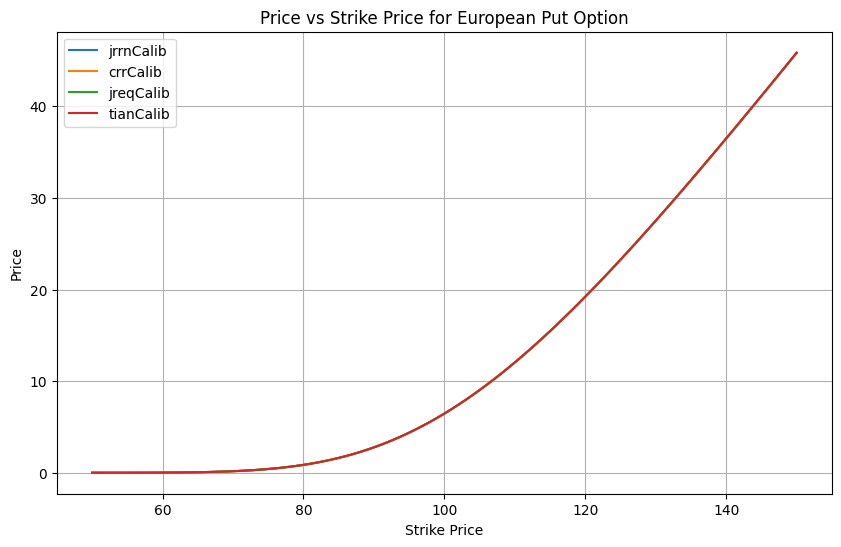

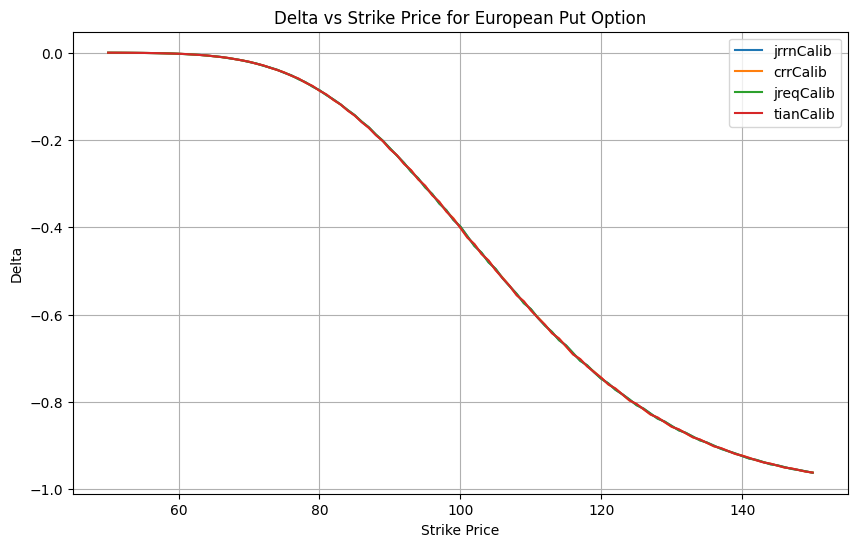

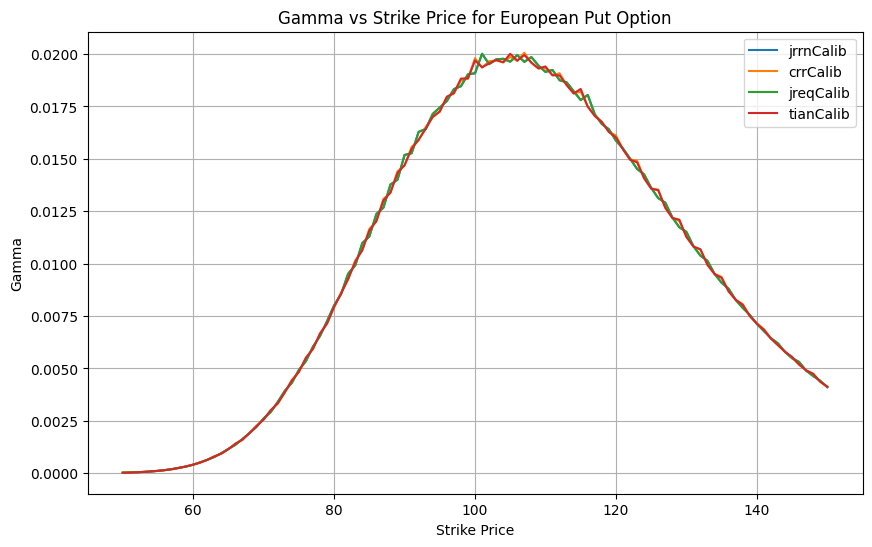

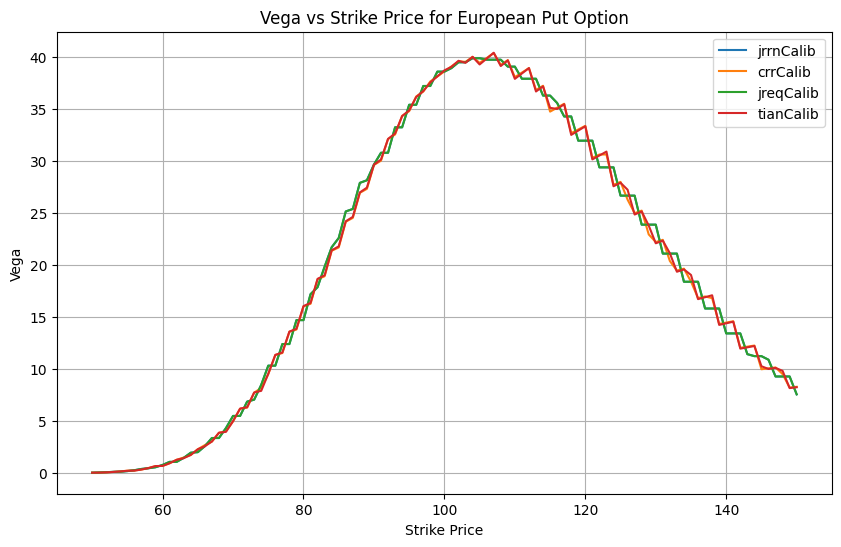

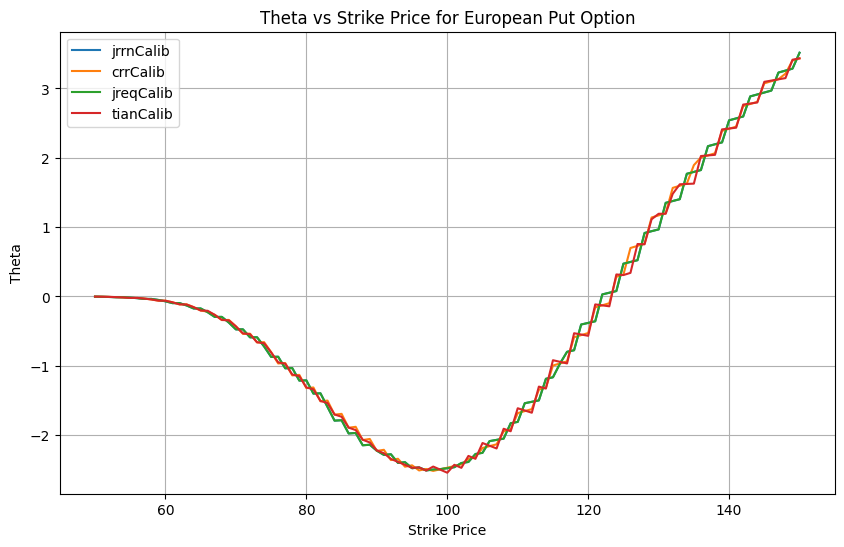

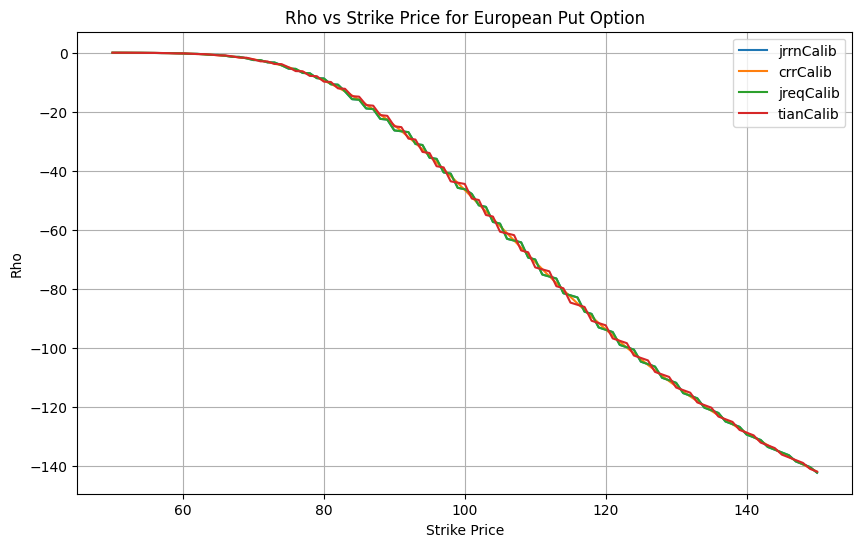

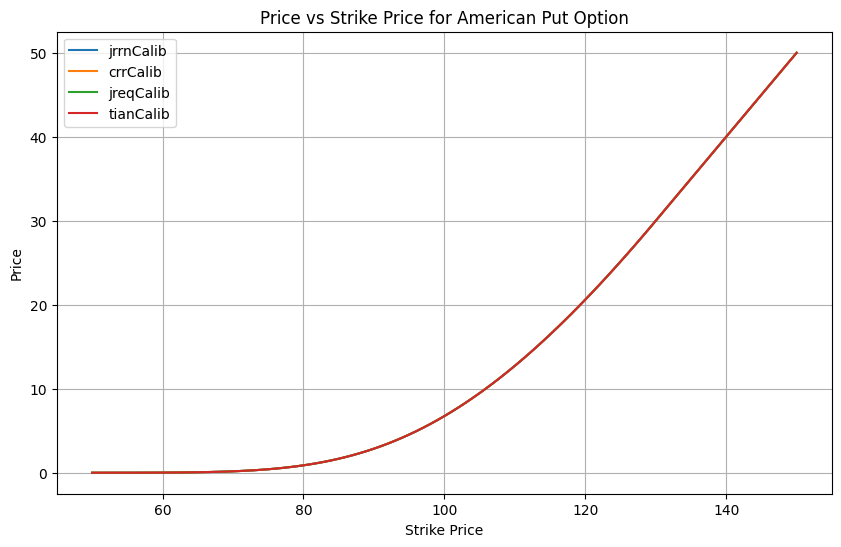

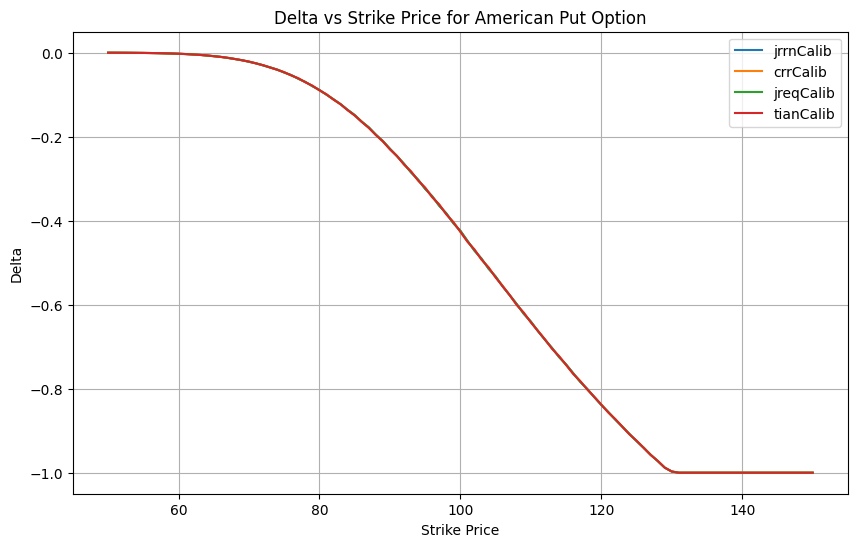

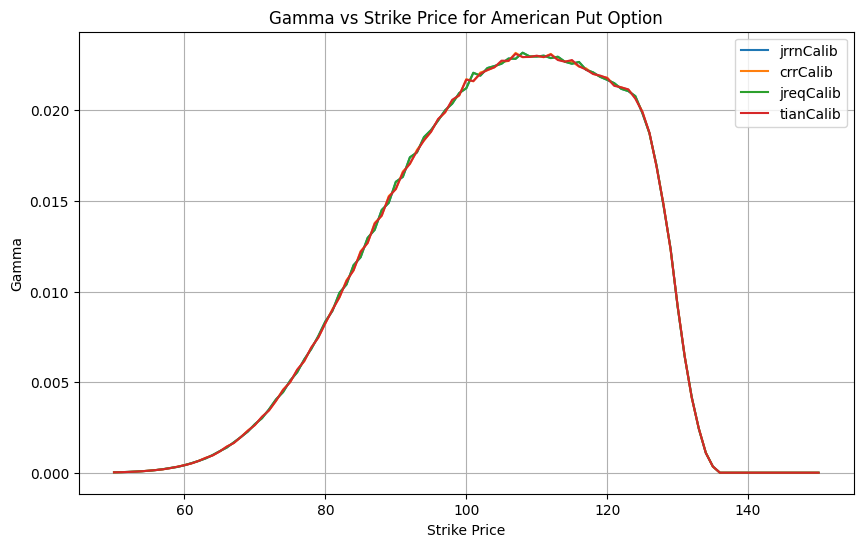

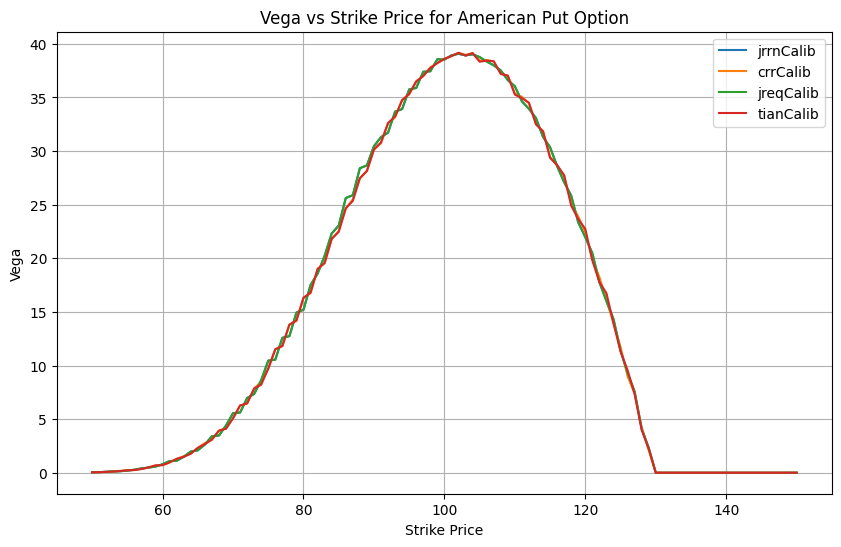

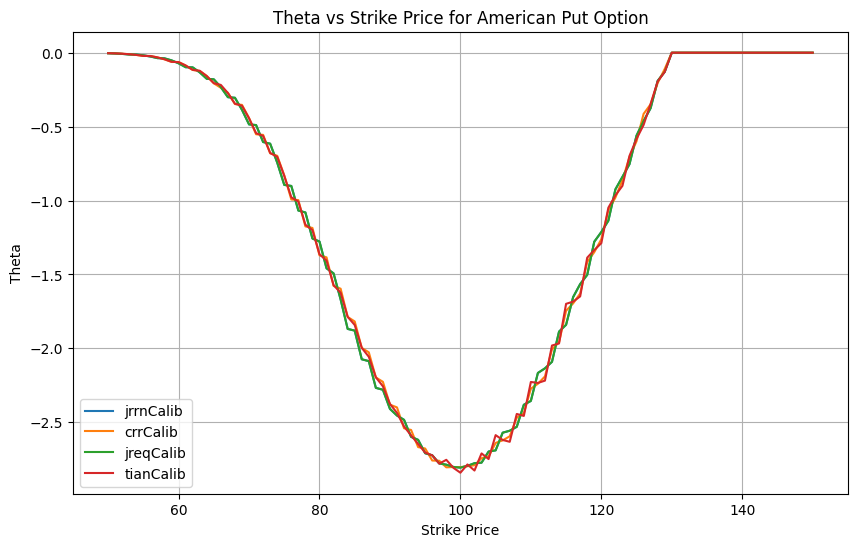

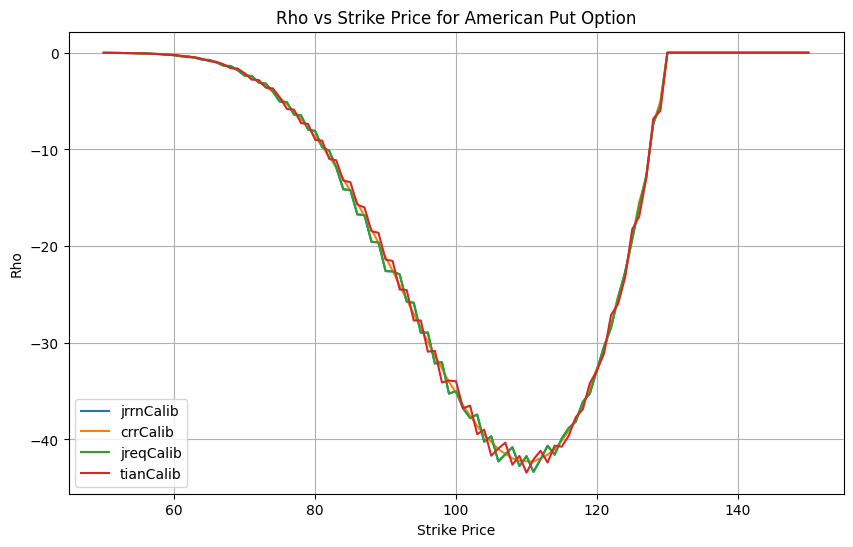

In [21]:
# Define parameters
S = 100
r = 0.03
vol = 0.2
T = 1
strikes = list(range(50, 151))
calibration_methods = [jrrnCalib, crrCalib, jreqCalib, tianCalib]
option_types = ['European', 'American']
greek_types = ['Price', 'Delta', 'Gamma', 'Vega', 'Theta', 'Rho']

# Placeholder for results
results = {otype: {gtype: {calib.__name__: [] for calib in calibration_methods} for gtype in greek_types} for otype in option_types}

# Compute values for each Greek, option type, and calibration method
for otype in option_types:
    for gtype in greek_types:
        for calib in calibration_methods:
            results[otype][gtype][calib.__name__] = [binomialGreeks(S, r, vol, T, K, gtype, otype, calib=calib) for K in strikes]

# Generate separate plots for each Greek and each option type
for otype in option_types:
    for gtype in greek_types:
        plt.figure(figsize=(10, 6))
        for calib in calibration_methods:
            plt.plot(strikes, results[otype][gtype][calib.__name__], label=calib.__name__)
        plt.xlabel('Strike Price')
        plt.ylabel(gtype)
        plt.title(f'{gtype} vs Strike Price for {otype} Put Option')
        plt.legend()
        plt.grid(True)
        plt.show()
